In [22]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [9]:
#Create
weight= 0.7
bias=0.3
start=0
end=1
step=0.02
X= torch.arange(start,end,step)
y=weight*X + bias
X[:10], y[:10]


(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [11]:
train_split=int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y [train_split:]
len (X_train), len (y_train), len (X_test) , len (y_test)

(40, 40, 10, 10)

In [12]:
X_train, y_train

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]))

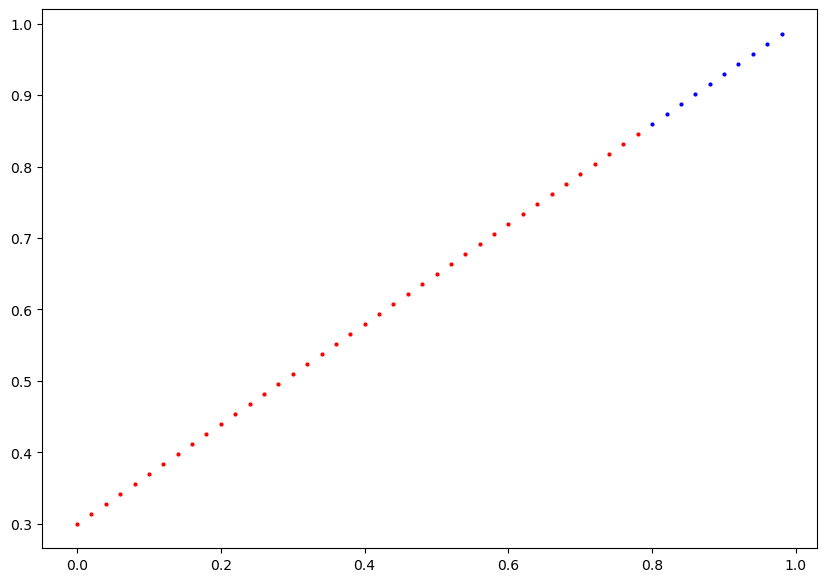

In [53]:
#Data visualizations
def plot_predictions(train_data=X_train, train_labels=y_train,test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))   
#plot training data in blue
    plt.scatter(train_data, train_labels, c="r",s=4, label='Training Data')

#plot test data in green
    plt.scatter(test_data, test_labels, c="b", s=4, label="Testing Data")

#check predictions
    if predictions is not None:
        plt.scatter(test_data,predictions, c="g", s=4, label="Predictions")

#show the legend
        plt.legend(prop={"size":14});
plot_predictions();
    

In [43]:
#building a model
from torch import Tensor 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float))
        self.bias=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
#forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x+self.bias
    


In [44]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [45]:
#creating a random seed
torch.manual_seed(42)
model_0= LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [46]:
#list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [47]:
X_test, y_test

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

In [55]:
y_preds=model_0(X_test).unsqueeze(dim=1)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<UnsqueezeBackward0>)

In [49]:
#Making predictions with model
with torch.inference_mode():
    y_preds=model_0(X_test).unsqueeze(dim=1)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

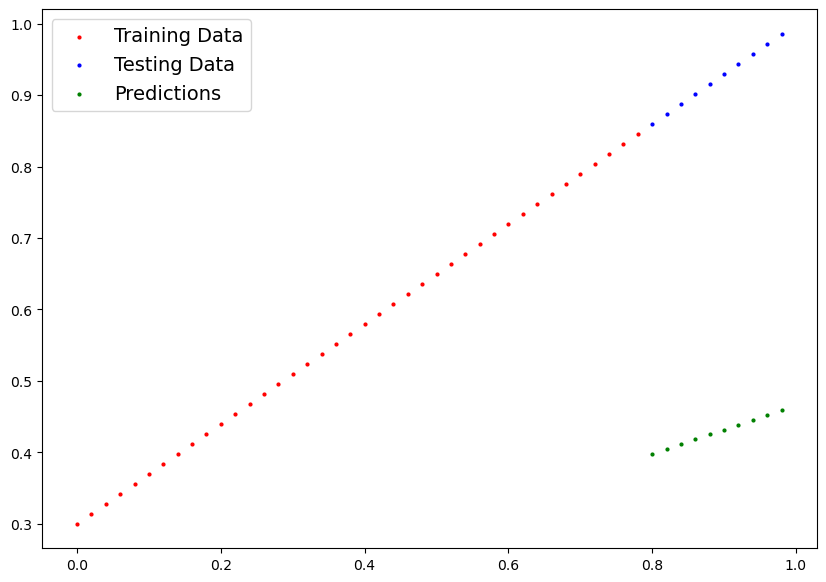

In [54]:
plot_predictions(predictions=y_preds)

In [ ]:
#Training model
